<a href="https://colab.research.google.com/github/srinijasriram/2216166_AIML_BootCamp_2023/blob/main/KNN_OUTBREAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv") 

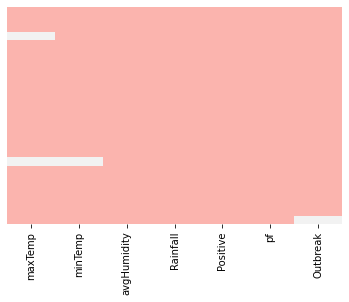

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [3]:
median_maxTemp=df['maxTemp'].median()
print(median_maxTemp)     

33.5


In [4]:
median_minTemp=df['minTemp'].median()
print(median_minTemp)

24.0


In [5]:
df['maxTemp']=df['maxTemp'].fillna(median_maxTemp)
df['minTemp']=df['minTemp'].fillna(median_minTemp)

In [6]:
from sklearn import preprocessing

#label encoding
LE=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Outbreak=LE.fit_transform(df.Outbreak) #converting variables to numeric values
df.head(26)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,33.5,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [7]:
median_Outbreak=df['Outbreak'].median()
print(median_Outbreak)

0.0


In [8]:
df['Outbreak']=df['Outbreak'].replace(2,0)
print(df)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf  Outbreak
0      29.0     18.0        49.74      0.00      2156  112         0
1      34.0     23.0        83.27     15.22     10717  677         1
2      40.0     23.0        50.74      0.00      1257  127         0
3      33.5     24.0        84.57     11.15      9693  482         0
4      34.0     24.0        59.16      9.06      4198  211         0
5      34.0     27.0        73.23      0.00     11808  712         1
6      31.0     24.0        88.77     41.40     10881  648         1
7      33.0     24.0        77.94     23.88      8830  459         1
8      31.0     24.0        84.57     11.15      9693  482         0
9      36.0     24.0        53.40      2.12      9310  549         0
10     32.0     23.0        57.50      0.00     13154  838         1
11     34.0     18.0        59.40      0.00      2197  136         0
12     42.0     24.0        49.43      2.19      3362  213         0
13     45.0     32.0        34.74 

In [9]:
df=df.drop(['Positive',   'pf'],axis =1)

In [10]:
X=df.iloc[:,:-1].values #iloc==>index location 2D array
Y=df.iloc[:,-1:].values #2D array

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [17]:
ypred=knn_model.predict(X_test)

In [18]:
print("predicted value for training data : ",knn_model.score(X_train,Y_train))
print("predicted value for testing data : ",knn_model.score(X_test,Y_test))
print("predicted value for overall data : ",knn_model.score(sst.transform(X),Y))

predicted value for training data :  0.85
predicted value for testing data :  0.6666666666666666
predicted value for overall data :  0.8076923076923077


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

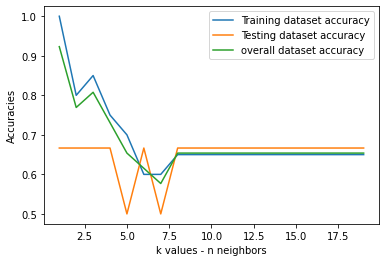

In [19]:
import numpy as np
neighbors = np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#Loop over K values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)

  #Compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(X_train,Y_train)
  test_accuracy[i]=knn.score(X_test,Y_test)

  #overall score
  overall_accuracy[i]=knn.score(sst.transform(X),Y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')
plt.legend()
plt.xlabel('k values - n neighbors')
plt.ylabel("Accuracies")
plt.show()